# UNSW MathSoc Presents: Welcome to Manim!

This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Some basic knowledge of Python is helpful! Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

> *Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

The documentation will contain all the information you need to install Manim locally and explore further! 

All the code used during this workshop can be found [here](https://github.com/jeremyle56/manim-workshop).

### A small note about Python and Jupyter Notebook

You don't have to know Python to be able to code in Manim but it will help. If you come from any C like language like C you'll notice that Python doesn't use curly braces for code blocks but instead uses indents to determine which code blocks within which block. Additionally there is no need for semi-colons in Python.

Jupyter Noteback provides a simple way to run small blocks of Python code and combine it with text which is perfect for this workshop! If you are building any larger scale project you would be using regular Python files.

## Setup

To run any code block you can hit the *Run* button above or press `Shift + Enter`.

We will now set up Manim by importing the library and setting a few config values. Feel free to adapt both of these settings to your liking.

In [50]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

If you have executed the cell successfully, a messaging printing the installed version of the library should have appeared below it.

### Note on this setup

Since this is a temporary test environment Manim is virtually installed we are sticking to this notebook. But if you decide to use Python files - to be able to create the video you will have to use the command line.

If you can figure out how to install it then you are most likely equipped to figure out to run manim on your file.

## Let's Draw Some Shapes

- These examples should be explained iteratively (line by line) and you should try experiment as to what happens if you exclude some lines.
- Objects (such as shapes) in Manim are called Mobjects
  - Mathematical Object: base class for objects that can be displayed on screen.

In [ ]:
%%manim -qm Circles

class Circles(Scene):
    def construct(self):
        circle = Circle(radius=1.0)
        
        self.play(Create(circle))
        self.wait()

In [ ]:
%%manim -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color = BLUE, fill_opacity = 0.5)
        green_square = Square(color = GREEN, fill_opacity = 0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

## Positioning Mobjects

In [ ]:
%%manim -qm CircleAndSquare

class CircleAndSquare(Scene):
    def construct(self):
        pink_circle = Circle()
        pink_circle.set_fill(PINK, opacity = 0.5)

        blue_square = Square()
        blue_square.set_fill(BLUE, opacity= 0.5)

        blue_square.next_to(pink_circle, RIGHT, buff = 0.5)        
        self.play(Create(pink_circle), Create(blue_square))
        self.wait()

## Animating

In [ ]:
%%manim -qm CircleToSquare

class AnimatedSquareToCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        square = Square()  # create a square

        self.play(Create(square))  # show the square on screen
        self.play(square.animate.rotate(PI / 4))  # rotate the square
        self.play(ReplacementTransform(square, circle))  # transform the square into a circle
        self.play(circle.animate.set_fill(PINK, opacity = 0.5))  # color the circle on screen

In [ ]:
%%manim -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()

In [ ]:
%%manim -qm MovingCube

class MovingCube(Scene):
    def construct(self):
        box = Rectangle(
            stroke_color=GREEN_C,
            stroke_opacity=0.7,
            fill_color=RED_B,
            fill_opacity=0.5,
            height=1,
            width=1,
        )

        self.add(box)
        self.play(box.animate.shift(RIGHT * 2), run_time=2)
        self.play(box.animate.shift(UP * 3), run_time=2)
        self.play(box.animate.shift(DOWN * 5 + LEFT * 5), run_time=2)
        self.play(box.animate.shift(UP * 1.5 + RIGHT * 1), run_time=2)

## Typesetting Mathematics

We can't learn a new programming technology without printing `Hello World`. 

In [ ]:
%%manim -qm Hello_World

class Hello_World(Scene):
    def construct(self):
        sq = Square(
            side_length=2,
            color=BLUE, 
            fill_color=LIGHT_GRAY, 
            fill_opacity=0.5, 
            sheen_factor=0.1, 
            stroke_width= 30
            ).to_edge(LEFT, buff= 0.5)
        
        Hello_World = Text("Hello World")
        Tri = Triangle().to_edge(RIGHT, buff= 0.5).scale(0.6)

        self.play(Create(Tri), Write(sq), run_time = 2)
        self.play(Write(Hello_World), run_time = 4)

        self.wait()

In [ ]:
%%manim -qm Formula

class Formula(Scene):
    def construct(self):
        formula = MathTex(r"\mathbf{w}_{k+1} = \mathbf{v}_{k+1} - \sum_{j=1}^k \mathrm{proj}_{\mathbf{w}_j}(\mathbf{v}_{k+1})")
        self.play(Write(formula), run_time = 3)
        self.wait(2)

In [42]:
%%manim -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("21 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("21 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{21}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()
        self.play(Create(SurroundingRectangle(eq3), buff=0.1))
        self.wait()

An interesting exercise could be to animate the derivation of a simple result such as the quadratic formula.

## Graphing

In [54]:
## idk how i feel about this one - its a bit weird

%%manim -qm Plot

class Plot(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 3, 1],
            x_length=5,
            y_length=3,
            axis_config={"include_tip": True, "numbers_to_exclude": [0]},
        ).add_coordinates()
        axis_labels = axes.get_axis_labels(x_label="x", y_label="f(x)")

        graph = axes.plot(lambda x: x**2, x_range=[0, 4], color=YELLOW)
        graphing_stuff = VGroup(axes, graph, axis_labels)

        self.play(DrawBorderThenFill(axes), Write(axis_labels))
        self.play(Create(graph))
        self.play(graphing_stuff.animate.shift(DOWN * 4))


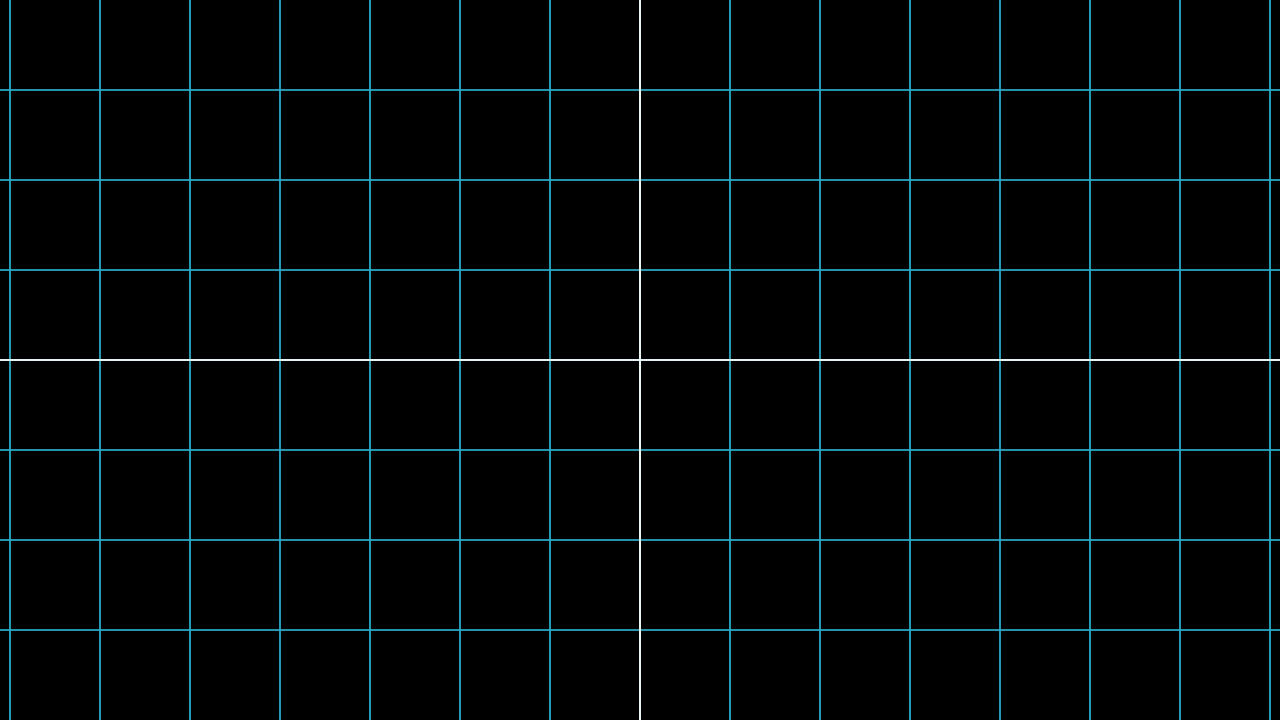

In [41]:
%%manim -qm Axes

class Axes(Scene):
    def construct(self):
        ax = NumberPlane()
        
        self.add(ax)